In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
df = pd.read_excel('FinalCovid.xlsx')

In [3]:
y = df["Tổng"]

In [4]:
x = range(1, len(y) + 1, 1)

In [5]:
X = [[a] for a in x]

In [101]:
#X_train = x

In [100]:
#reg = LogisticRegression().fit(X_train, y)

In [91]:
#test = scipy.stats.linregress(X_train, y)

In [97]:
#reg.score(X_train, y)

In [98]:
#plt.plot(X_train, Y_train, 'o', label='original data')
#plt.plot(X_train, test.intercept + test.slope*X_train, 'r', label='fitted line')

In [99]:
#reg.predict([[700]])

## Shuffle Data

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# X_train15 = X_train[:-15]
# Y_train15 = y[:-15]
# X_test = X_train[-15:]
# Y_test = y[-15:]

In [7]:
x1 = range(1,len(y)+1,1)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x1, y, test_size=0.33, random_state=42)

In [8]:
train_x = np.array(X_train1)
train_y = np.array(Y_train1)

n = len(X_train1)


XXX = np.ones((n,1))


t = np.ones((1,n))
for i in range(4):
  t = t*train_x
  XXX = np.concatenate((XXX, t.T), axis=1)
print(XXX)
print(XXX.shape)

[[1.00000000e+00 1.85000000e+02 3.42250000e+04 6.33162500e+06
  1.17135062e+09]
 [1.00000000e+00 5.18000000e+02 2.68324000e+05 1.38991832e+08
  7.19977690e+10]
 [1.00000000e+00 1.79000000e+02 3.20410000e+04 5.73533900e+06
  1.02662568e+09]
 ...
 [1.00000000e+00 2.71000000e+02 7.34410000e+04 1.99025110e+07
  5.39358048e+09]
 [1.00000000e+00 4.36000000e+02 1.90096000e+05 8.28818560e+07
  3.61364892e+10]
 [1.00000000e+00 1.03000000e+02 1.06090000e+04 1.09272700e+06
  1.12550881e+08]]
(430, 5)


In [9]:
beta = (np.linalg.inv(np.dot(XXX.T,XXX)))@XXX.T@train_y.T
print(beta)

[-2.25881185e+04  4.94959156e+02  4.30493861e-01 -1.92056771e-02
  3.93816533e-05]


In [10]:
#loss 
y_prediction = beta[0]+beta[1]*train_x + beta[2]*(train_x**2) + beta[3]*(train_x**3)+beta[4]*(train_x**4)
epsilon = train_y - y_prediction
loss = epsilon.T @ epsilon
print(np.log(loss))


35.23836830700891


In [11]:
test_x = np.array(X_test1)
test_y = np.array(Y_test1)
y_prediction = beta[0]+beta[1]*test_x + beta[2]*(test_x**2) + beta[3]*(test_x**3)+beta[4]*(test_x**4)
epsilon = test_y - y_prediction
loss = epsilon.T @ epsilon
print(np.log(loss))

34.76291394109666


In [10]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform([[test] for test in X_train1])
 
poly.fit(X_poly, Y_train1)
lin2 = LinearRegression()
lin2.fit(X_poly, Y_train1)

LinearRegression()

In [11]:
lin2.coef_

array([ 0.00000000e+00,  4.94959179e+02,  4.30493793e-01, -1.92056770e-02,
        3.93816532e-05])

In [12]:
lin2.intercept_

-22588.11981298114

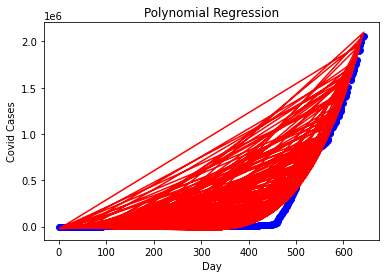

In [168]:
# Visualising the Polynomial Regression results
plt.scatter(X_train, Y_train, color = 'blue')

plt.plot(X_train, lin2.predict(poly.fit_transform(X_train)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Day')
plt.ylabel('Covid Cases')

plt.show()


In [156]:
lin2.coef_

array([ 0.00000000e+00,  4.94959179e+02,  4.30493793e-01, -1.92056770e-02,
        3.93816532e-05])

In [157]:
X_train_adapter = poly.fit_transform(X_train)
X_test_adapter = poly.fit_transform(X_test)

In [158]:
lin2.score(X_test_adapter, Y_test)

0.9929383675173731

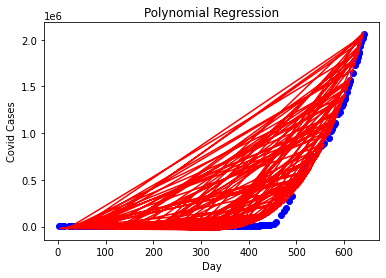

In [172]:
plt.scatter(X_test, Y_test, color = 'blue')

plt.plot(X_test, lin2.predict(X_test_adapter), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Day')
plt.ylabel('Covid Cases')

plt.show()

In [173]:
lin2.score(X_test_adapter, Y_test)

0.9929383675173731

In [175]:
result = lin2.predict(X_test_adapter)

In [183]:
finalRes = result - Y_test

In [184]:
finalRes = finalRes.tolist

In [185]:
finalRes

<bound method IndexOpsMixin.tolist of 630    21290.933960
367   -19825.563516
485    38342.511757
290   -34821.146078
72      9141.036515
           ...     
93     14477.676627
260   -24282.591021
490    17800.512273
586     2993.910900
28     -8593.811698
Name: Tổng, Length: 213, dtype: float64>

## Không Shuffle Data

### Split by percent (For example: 8 - 2, 7 - 3)

In [148]:
testSplitPercent = 0.25
testDays = int(testSplitPercent*len(X))
pos = testDays*(-1)
X_train = X[:pos]
Y_train = y[:pos]
X_test = X[pos:]
Y_test = y[pos:]
X_train_adapter = poly.fit_transform(X_train)
X_test_adapter = poly.fit_transform(X_test)

In [149]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X_train)
 
poly.fit(X_poly, Y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, Y_train)

LinearRegression()

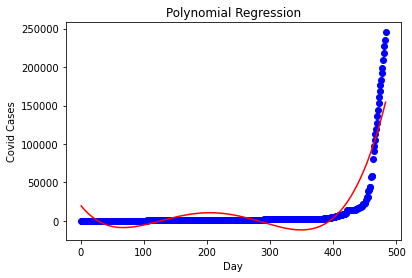

In [150]:
plt.scatter(X_train, Y_train, color = 'blue')

plt.plot(X_train, lin2.predict(X_train_adapter), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Day')
plt.ylabel('Covid Cases')

plt.show()

In [151]:
lin2.score(X_train_adapter, Y_train)

0.7830225481462654

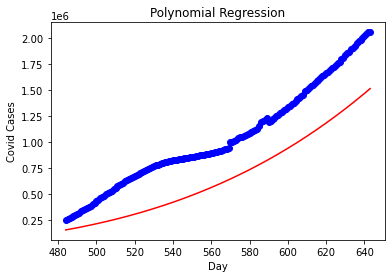

In [152]:
plt.scatter(X_test, Y_test, color = 'blue')

plt.plot(X_test, lin2.predict(X_test_adapter), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Day')
plt.ylabel('Covid Cases')

plt.show()

In [164]:
lin2.score(X_test_adapter, Y_test)

0.9929383675173731